# Importing all the Dependencies

In [2]:
#matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
from config import gkey
import matplotlib.pyplot as plt
import gmaps
import requests
import json
Data_Files =pd.read_csv("survey_results_public.csv", encoding ='utf-8')

In [3]:
gmaps.configure(api_key=gkey)
GOOGLE_MAPS_API_URL = 'https://maps.googleapis.com/maps/api/geocode/json?'


In [4]:
Data_Files.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# Age Demographics

* Categorized the existing developers using the age bins
* Calculated the numbers and percentages by age group
* Created a summary data frame to hold the results


In [5]:
Age_Gender_DF = Data_Files.loc[:,["Country","Gender","Age"]]
Age_Gender_DF["Age"]= Age_Gender_DF["Age"].replace({"25 - 34 years old":"25-34","18 - 24 years old":"18 - 24","35 - 44 years old":"35 - 44","45 - 54 years old":"45 - 54","Under 18 years old":"< 18","55 - 64 years old":"55 - 64","65 years or older":"> 65"})
Age_Gender_DF["Age"].value_counts()
Age_Gender_DF.head()

,Country,Gender,Age
0,Kenya,Male,25-34
1,United Kingdom,Male,35 - 44
2,United States,NaN,NaN
3,United States,Male,35 - 44
4,South Africa,Male,18 - 24


*Data Cleaning for Gender Demographics

*Cleaned Gender Column to just Three Gender Groups: Male, Female, Other / Non-Disclosed

*Rounded the percentage column to two decimal points

*Display Age Demographics Table


In [6]:
Age_Gender_DF["Gender"]=Age_Gender_DF["Gender"].replace({"Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Transgender":"Female",\
                                                        "Male;Non-binary, genderqueer, or gender non-conforming":"Male","Transgender":"Other / Non-Disclosed","Female;Male":"Other / Non-Disclosed",\
                                                        "Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Male;Transgender":"Male","Female;Transgender;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender":"Other / Non-Disclosed","Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Male",\
                                                        "Female;Male;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed"})
Count_Gender= Age_Gender_DF["Gender"].value_counts()
Gender_df=pd.DataFrame(Count_Gender)
Tot= Count_Gender.sum()
Gender_df["Percentage Of Developers"]=round(Count_Gender*100/Tot,2)
Gender_df

,Gender,Percentage Of Developers
Male,59620,92.48
Female,4244,6.58
Other / Non-Disclosed,605,0.94


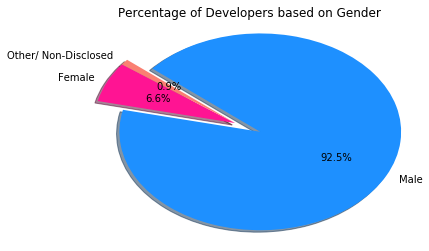

In [7]:
Labels= ["Male","Female","Other/ Non-Disclosed"]
Sizes =Gender_df["Percentage Of Developers"].values
colors = ["dodgerblue", "deeppink", "salmon"]
explode = (0.2, 0, 0)
plt.pie(Sizes, explode=explode, labels=Labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140,counterclock=False,pctdistance =0.6)
plt.title("Percentage of Developers based on Gender")
plt.axis("normal")
# Save Figure
plt.savefig("Images/Gender_Percentage.png")
plt.show()

# Gender Demographics

*Created DataFrame to Analyze Gender Demographics using Country, Age Group, Gender

*Cleaned the Data to Remove NAs

In [8]:
Age_Gender_DF =Age_Gender_DF.dropna()
Age_Gender_DF["Age"].value_counts()

25-34      31203
18 - 24    14956
35 - 44    11276
45 - 54     3243
< 18        1596
55 - 64      937
> 65         171
Name: Age, dtype: int64

# DataFrames by Gender and Age Group

In [9]:
Age_Male_DF=Age_Gender_DF.loc[Age_Gender_DF["Gender"]=="Male",:]
Male_Age = Age_Male_DF["Age"].value_counts()
Male_Age_df = pd.DataFrame({"Gender":"Male","Number Of Developers": Male_Age})
Male_Age_df["Percentage of Developers"]=round(Male_Age_df["Number Of Developers"]*100/Male_Age_df["Number Of Developers"].sum(),2)
Male_Age_df

,Gender,Number Of Developers,Percentage of Developers
25-34,Male,28756,49.02
18 - 24,Male,13651,23.27
35 - 44,Male,10660,18.17
45 - 54,Male,3056,5.21
< 18,Male,1505,2.57
55 - 64,Male,877,1.50
> 65,Male,153,0.26


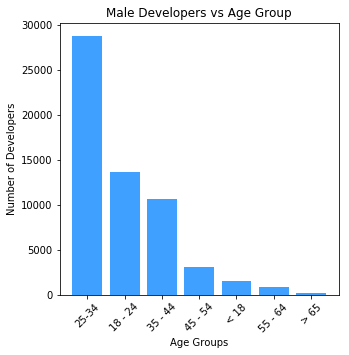

In [10]:
plt.figure(figsize=(5,5))
x_axis_male=Male_Age_df.index.values
plt.bar(x_axis_male, Male_Age_df["Number Of Developers"], align='center', alpha=0.85, color ="dodgerblue")
plt.title("Male Developers vs Age Group")
plt.xlabel("Age Groups")
plt.xticks(rotation=45)
plt.ylabel("Number of Developers")
plt.savefig("Images/Male Developers vs Age Group.png")
plt.show()

In [11]:
Age_Female_DF=Age_Gender_DF.loc[Age_Gender_DF["Gender"]=="Female",:]
Female_Age = Age_Female_DF["Age"].value_counts()
Female_Age_df = pd.DataFrame({"Gender":"Female","Number Of Developers": Female_Age})
Female_Age_df["Percentage of Developers"]=round(Female_Age_df["Number Of Developers"]*100/Female_Age_df["Number Of Developers"].sum(),2)
Female_Age_df

,Gender,Number Of Developers,Percentage of Developers
25-34,Female,2189,52.81
18 - 24,Female,1117,26.95
35 - 44,Female,557,13.44
45 - 54,Female,168,4.05
< 18,Female,54,1.30
55 - 64,Female,52,1.25
> 65,Female,8,0.19


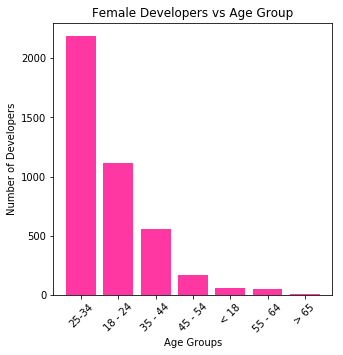

In [12]:
plt.figure(figsize=(5,5))
x_axis_female=Female_Age_df.index.values
plt.bar(x_axis_female, Female_Age_df["Number Of Developers"], align='center', alpha=0.85,color= "deeppink")
plt.title("Female Developers vs Age Group")
plt.xlabel("Age Groups")
plt.xticks(rotation=45)
plt.ylabel("Number of Developers")
plt.savefig("Images/Female Developers vs Age Group.png")
plt.show()

In [13]:
Age_Other_DF=Age_Gender_DF.loc[Age_Gender_DF["Gender"]=="Other / Non-Disclosed",:]
Other_Age = Age_Other_DF["Age"].value_counts()
Other_Age_df = pd.DataFrame({"Gender":"Other / Non-Disclosed","Number Of Developers": Other_Age})
Other_Age_df["Percentage of Developers"]=round(Other_Age_df["Number Of Developers"]*100/Other_Age_df["Number Of Developers"].sum(),2)
Other_Age_df


,Gender,Number Of Developers,Percentage of Developers
25-34,Other / Non-Disclosed,258,44.56
18 - 24,Other / Non-Disclosed,188,32.47
35 - 44,Other / Non-Disclosed,59,10.19
< 18,Other / Non-Disclosed,37,6.39
45 - 54,Other / Non-Disclosed,19,3.28
> 65,Other / Non-Disclosed,10,1.73
55 - 64,Other / Non-Disclosed,8,1.38


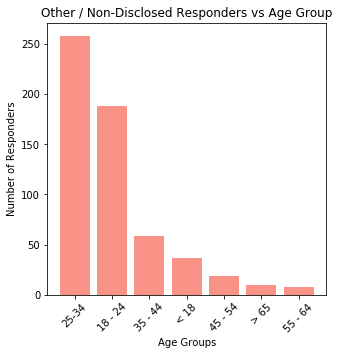

In [14]:
plt.figure(figsize=(5,5))
x_axis=Other_Age_df.index.values
plt.bar(x_axis, Other_Age_df["Number Of Developers"], align='center', alpha=0.85,color= "salmon")
plt.title("Other / Non-Disclosed Responders vs Age Group")
plt.xlabel("Age Groups")
plt.xticks(rotation=45)
plt.ylabel("Number of Responders")
plt.savefig("Images/Other-Non-Disclosed Responders vs Age Group.png")
plt.show()

Text(2.5, 0.5, 'Number of Developers')

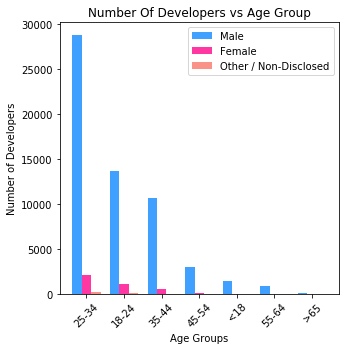

In [15]:
x_axis = np.arange(7)
plt.figure(figsize=(5,5))
bar_width = 0.25
opacity = 0.8
male_plot = plt.bar(x_axis, Male_Age_df["Number Of Developers"],bar_width, align='center', alpha=0.85, color ="dodgerblue", Label ="Male")
female_plot =plt.bar(x_axis+bar_width, Female_Age_df["Number Of Developers"],bar_width, align='center', alpha=0.85,color= "deeppink", Label="Female")
Others_plot=plt.bar(x_axis+bar_width+bar_width, Other_Age_df["Number Of Developers"], bar_width,align='center', alpha=0.85,color= "salmon",Label="Other / Non-Disclosed")
plt.title("Number Of Developers vs Age Group")
plt.xlabel("Age Groups")
#plt.ylim(0,500)
plt.xticks(x_axis + bar_width, ("25-34","18-24","35-44","45-54","<18","55-64",">65"),rotation=45)
plt.legend((male_plot,female_plot,Others_plot),("Male","Female","Other / Non-Disclosed"))
plt.savefig("Images/Number Of Developers vs Age Group.png")
plt.ylabel("Number of Developers")


In [22]:
Age_Gender_DF.head()

,Country,Gender,Age
0,Kenya,Male,25-34
1,United Kingdom,Male,35 - 44
3,United States,Male,35 - 44
4,South Africa,Male,18 - 24
5,United Kingdom,Male,18 - 24


# Female DataFrame

In [23]:

Demographics_Female = Age_Gender_DF.loc[(Age_Gender_DF["Gender"]=="Female"),:]
Demographics_Female.reset_index(level=0, inplace=True)
Female_Responders=  Demographics_Female["Country"].value_counts()
df_Female=pd.DataFrame(Female_Responders)
df_Female=df_Female.drop("Other Country (Not Listed Above)", axis=0)
df_Female["Gender"]="Female"
df_Female.reset_index(level=0, inplace=True)
df_Female=df_Female.rename(columns = {"index":"Country","Country": "Number Of Developers"})
df_Female["Longitude"]=""
df_Female["Latitude"]=""

for index, row in df_Female.iterrows():
    address = row['Country']
    params = {'address': address,'key':gkey}
    Response= requests.get(GOOGLE_MAPS_API_URL, params=params).json()
    df_Female.loc[index, 'Longitude']=Response["results"][0]["geometry"]["location"]["lng"]
    df_Female.loc[index, 'Latitude']=Response["results"][0]["geometry"]["location"]["lat"]


In [24]:
df_Female.head()

,Country,Number Of Developers,Gender,Longitude,Latitude
0,United States,1385,Female,-95.7129,37.0902
1,India,407,Female,78.9629,20.5937
2,United Kingdom,278,Female,-3.43597,55.3781
3,Canada,217,Female,-106.347,56.1304
4,Germany,202,Female,10.4515,51.1657


In [25]:
locations = df_Female[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = df_Female["Number Of Developers"].astype(float)
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
fig = gmaps.figure()
fig

# Male DataFrame

In [26]:

Demographics_Male = Age_Gender_DF.loc[(Age_Gender_DF["Gender"]=="Male"),:]
Demographics_Male.reset_index(level=0, inplace=True)
Male_Responders=  Demographics_Male["Country"].value_counts()
df_Male=pd.DataFrame(Male_Responders)
df_Male=df_Male.drop("Other Country (Not Listed Above)", axis=0)
df_Male["Gender"]="Male"
df_Male.reset_index(level=0, inplace=True)
df_Male=df_Male.rename(columns = {"index":"Country","Country": "Number Of Developers"})
df_Male["Longitude"]=""
df_Male["Latitude"]=""

for index, row in df_Male.iterrows():
    address = row['Country']
    params = {'address': address,'key':gkey}
    Response= requests.get(GOOGLE_MAPS_API_URL, params=params).json()
    df_Male.loc[index, 'Longitude']=Response["results"][0]["geometry"]["location"]["lng"]
    df_Male.loc[index, 'Latitude']=Response["results"][0]["geometry"]["location"]["lat"]


In [27]:
df_Male.head()

,Country,Number Of Developers,Gender,Longitude,Latitude
0,United States,13787,Male,-95.7129,37.0902
1,India,5973,Male,78.9629,20.5937
2,United Kingdom,4223,Male,-3.43597,55.3781
3,Germany,4159,Male,10.4515,51.1657
4,Canada,2179,Male,-106.347,56.1304


In [28]:
locations = df_Male[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = df_Male["Number Of Developers"].astype(float)
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Other/Not Defined

In [30]:
Demographics_Other = Age_Gender_DF.loc[(Age_Gender_DF["Gender"]=="Other / Non-Disclosed"),:]
Demographics_Other.reset_index(level=0, inplace=True)
Other_Responders=  Demographics_Other["Country"].value_counts()
df_Other=pd.DataFrame(Other_Responders)
df_Other=df_Other.drop("Other Country (Not Listed Above)", axis=0)
df_Other["Gender"]="Other / Non-Disclosed"
df_Other.reset_index(level=0, inplace=True)
df_Other=df_Other.rename(columns = {"index":"Country","Country": "Number Of Developers"})
df_Other["Longitude"]=""
df_Other["Latitude"]=""

for index, row in df_Other.iterrows():
    address = row['Country']
    params = {'address': address,'key':gkey}
    Response= requests.get(GOOGLE_MAPS_API_URL, params=params).json()
    df_Other.loc[index, 'Longitude']=Response["results"][0]["geometry"]["location"]["lng"]
    df_Other.loc[index, 'Latitude']=Response["results"][0]["geometry"]["location"]["lat"]
df_Other.head()

,Country,Number Of Developers,Gender,Longitude,Latitude
0,United States,167,Other / Non-Disclosed,-95.7129,37.0902
1,India,54,Other / Non-Disclosed,78.9629,20.5937
2,United Kingdom,48,Other / Non-Disclosed,-3.43597,55.3781
3,Germany,43,Other / Non-Disclosed,10.4515,51.1657
4,Canada,27,Other / Non-Disclosed,-106.347,56.1304


In [31]:
locations = df_Other[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = df_Other["Number Of Developers"].astype(float)
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))